In [1]:
%load_ext autoreload

%autoreload 2

from torch import nn
import numpy as np
from utils import generate_random_numbers, plot_distribution
import torch

from tqdm.auto import tqdm
from torch.utils.data import DataLoader, Dataset
from matplotlib.pyplot import plot
import matplotlib.pyplot as plt

/Users/alireza/repos/ai-odyssey/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def custom_pdf(x):
    mean1, std1 = 2, 0.5
    mean2, std2 = 5, 0.5
    mean3, std3 = 8, 0.5

    gauss1 = np.exp(-0.5 * ((x - mean1) / std1) ** 2) / (std1 * np.sqrt(2 * np.pi))
    gauss2 = np.exp(-0.5 * ((x - mean2) / std2) ** 2) / (std2 * np.sqrt(2 * np.pi))
    gauss3 = np.exp(-0.5 * ((x - mean3) / std3) ** 2) / (std3 * np.sqrt(2 * np.pi))

    # sinusoidal_modulation = 0.5 * (1 + np.sin(2 * np.pi * x / 10))

    # return (gauss1 + gauss2 + gauss3) * sinusoidal_modulation
    return (gauss1 + gauss2 + gauss3) 

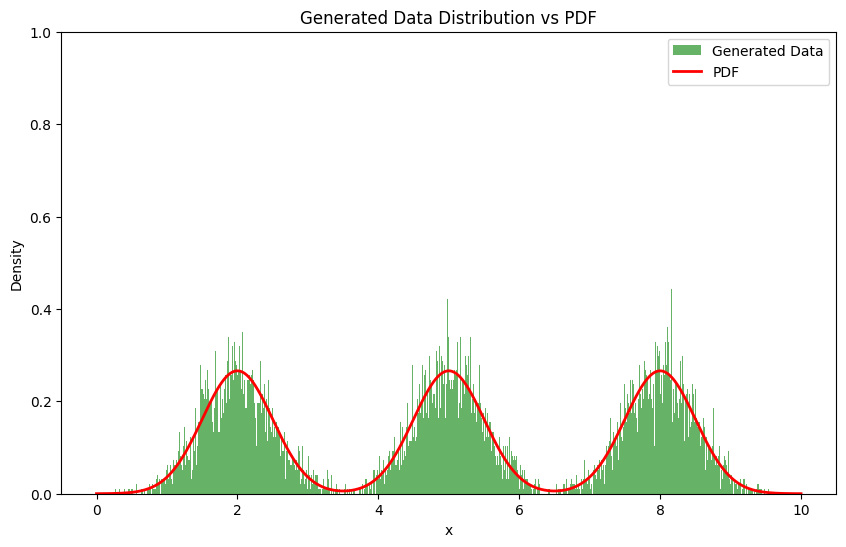

In [3]:
x_range = (0, 10)
num_samples = 10000
samples = generate_random_numbers(custom_pdf, x_range, num_samples)
plot_distribution(samples, custom_pdf, x_range)

In [4]:
samples[:100]

array([7.53059511, 2.48470464, 4.9985381 , 7.69198332, 2.70170779,
       2.4751337 , 8.19229236, 1.9564927 , 5.70354544, 8.41962385,
       5.36325579, 1.99554293, 4.84278191, 2.19942645, 5.27703059,
       4.54641852, 5.57822602, 5.30130365, 2.02535698, 8.15241137,
       2.63869341, 7.13567056, 2.44414523, 2.08135977, 7.51000024,
       8.23344632, 4.94977778, 4.9862499 , 7.36151559, 5.42837442,
       2.65283023, 2.66452507, 7.79703935, 9.16868727, 1.72066625,
       9.11131805, 5.61259457, 8.25225016, 8.0241305 , 1.62145644,
       7.69802483, 1.89597963, 4.58915635, 1.90186774, 7.5582321 ,
       2.22662474, 5.15022961, 7.83633624, 1.96704135, 8.18092667,
       8.26767478, 2.12665445, 4.89982033, 1.68804392, 7.97265335,
       7.85828738, 2.42407145, 4.72697319, 2.41174957, 1.70931637,
       5.0687594 , 1.60258141, 2.29541469, 7.58332884, 6.80826128,
       5.20755055, 8.32860078, 8.2566611 , 2.09457717, 2.02720022,
       2.4716343 , 1.3466079 , 0.32157128, 7.87828156, 5.10882

In [5]:
class AutoEncoder(nn.Module):
    def __init__(self, input_dim, hidden_dim, z_dim):
        super(AutoEncoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            # nn.ReLU(),
            # nn.Linear(hidden_dim, hidden_dim),
            # nn.ReLU(),
            # nn.Linear(hidden_dim, z_dim)
        )
        self.decoder = nn.Sequential(
            nn.Linear(z_dim, hidden_dim),
            # nn.ReLU(),
            # nn.Linear(hidden_dim, hidden_dim),
            # nn.ReLU(),
            # nn.Linear(hidden_dim, input_dim)
        )

        # self.mu = nn.Linear(hidden_dim, z_dim)
        # self.log_var = nn.Linear(hidden_dim, z_dim)
    def latent(self, x):
        return self.encoder(x)

    def forward(self, x):
        hidden = self.encoder(x)
        output = self.decoder(hidden)
        return output
        # mu = self.mu(hidden)
        # log_var = self.log_var(hidden)
        # return mu, log_var



In [6]:
torch.manual_seed(0)  # Set for testing purposes, please do not change!
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("Using CUDA device:", torch.cuda.get_device_name(device))
else:
    device = torch.device("cpu")
    print("Using CPU device.")


class NumbersDataset(Dataset):
    def __init__(self, numbers):
        self.numbers = numbers

    def __len__(self):
        return len(self.numbers)

    def __getitem__(self, idx):
        number = self.numbers[idx]
        return torch.tensor(number, dtype=torch.float32)



Using CPU device.


In [7]:
lr = 1e-3
n_epochs = 500
batch_size = 512
cur_step = 1 
display_step = 10

In [8]:
ae = AutoEncoder(input_dim=1, hidden_dim=1, z_dim=1)
optimizer = torch.optim.Adam(ae.parameters(), lr=lr)
criterion = torch.nn.MSELoss()
dataset = NumbersDataset(samples)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(dataset, batch_size=len(dataloader))


  0%|          | 0/20 [00:00<?, ?it/s]/Users/alireza/repos/ai-odyssey/.venv/lib/python3.11/site-packages/torch/nn/modules/loss.py:538: UserWarning: Using a target size (torch.Size([512, 1])) that is different to the input size (torch.Size([512])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/Users/alireza/repos/ai-odyssey/.venv/lib/python3.11/site-packages/torch/nn/modules/loss.py:538: UserWarning: Using a target size (torch.Size([272, 1])) that is different to the input size (torch.Size([272])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
100%|██████████| 20/20 [00:00<00:00, 145.64it/s]


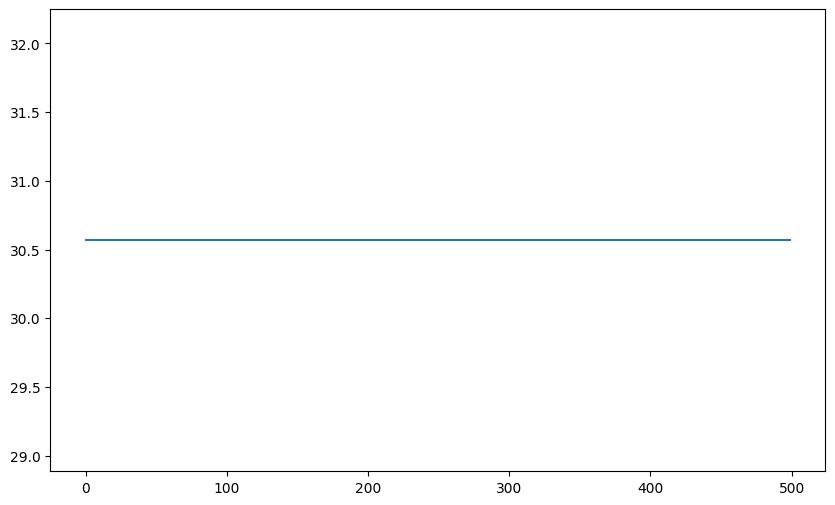

100%|██████████| 20/20 [00:00<00:00, 457.29it/s]


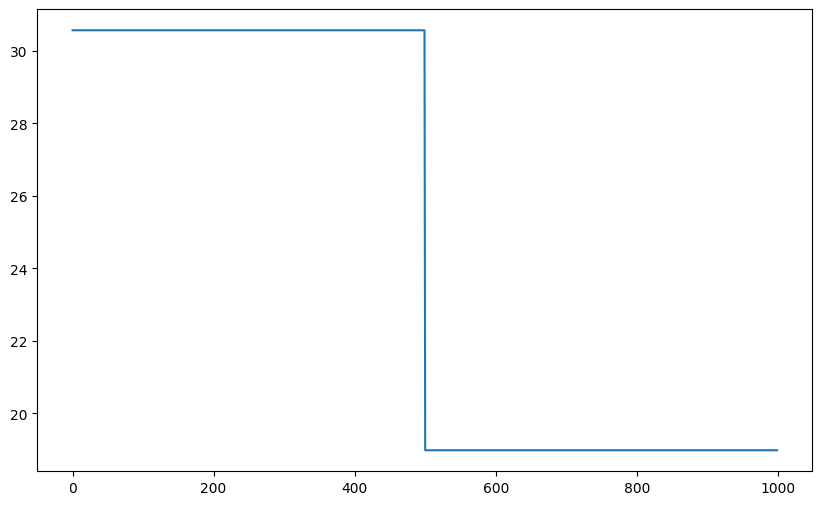

100%|██████████| 20/20 [00:00<00:00, 440.26it/s]


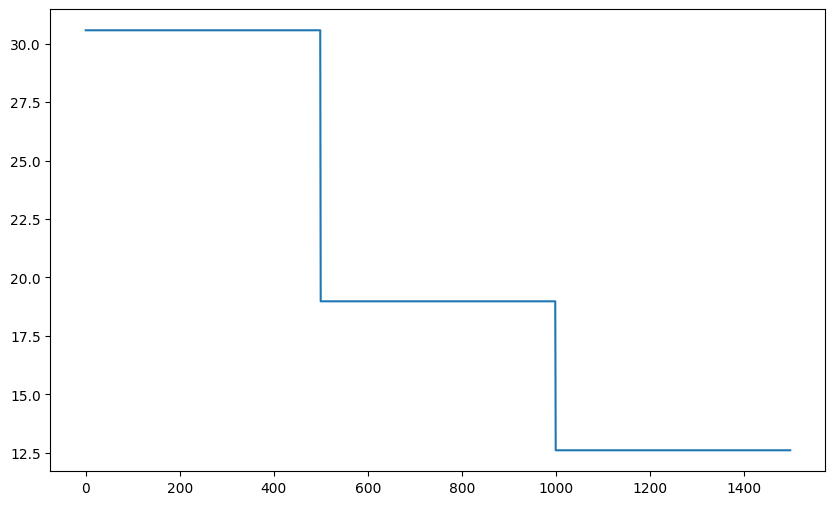

100%|██████████| 20/20 [00:00<00:00, 347.48it/s]


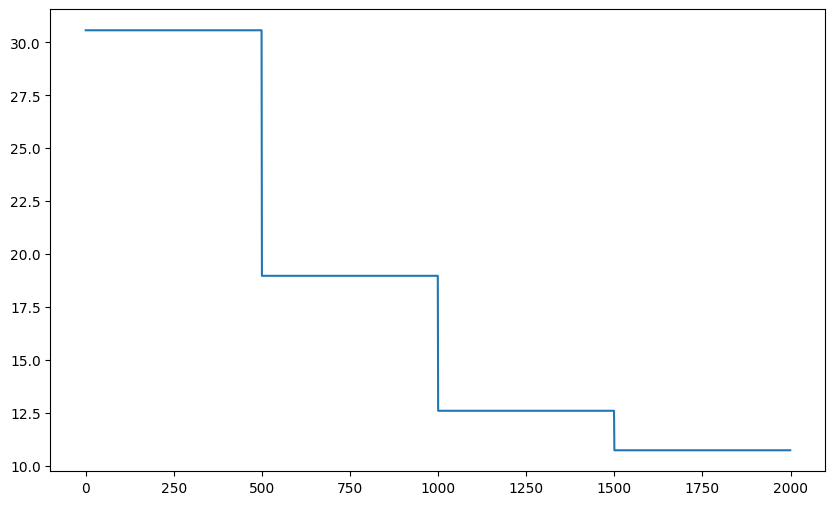

100%|██████████| 20/20 [00:00<00:00, 504.43it/s]


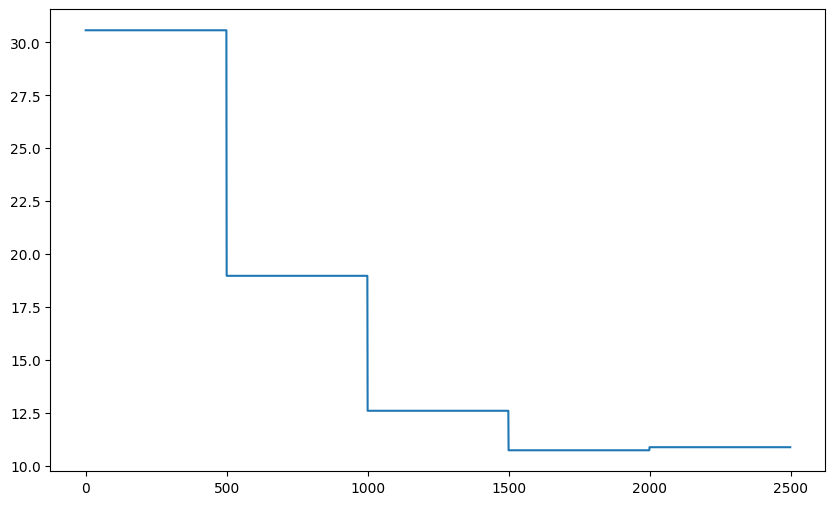

100%|██████████| 20/20 [00:00<00:00, 453.53it/s]


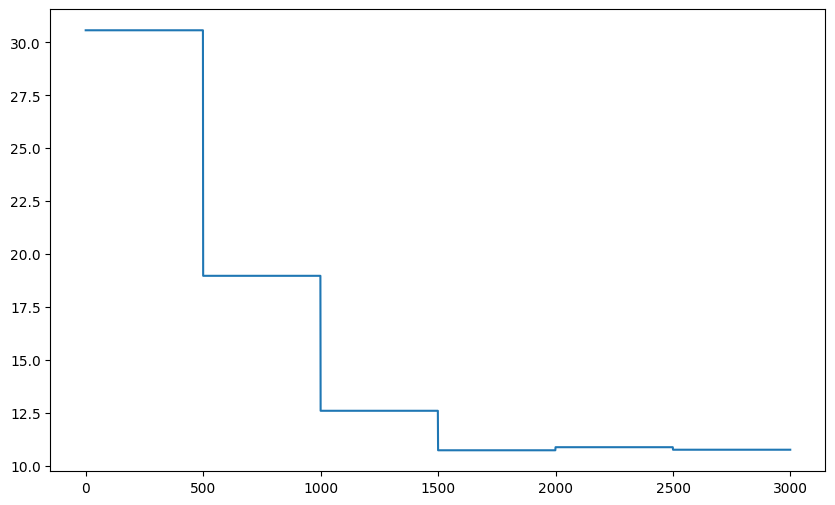

100%|██████████| 20/20 [00:00<00:00, 397.62it/s]


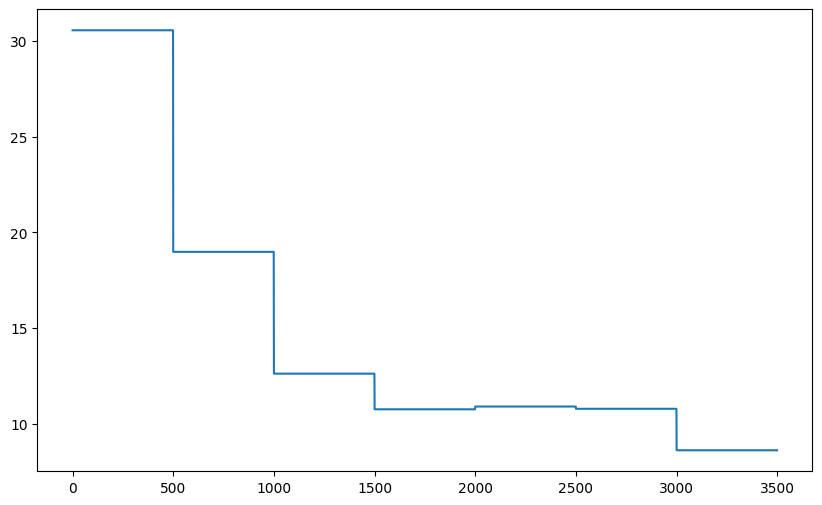

100%|██████████| 20/20 [00:00<00:00, 410.36it/s]


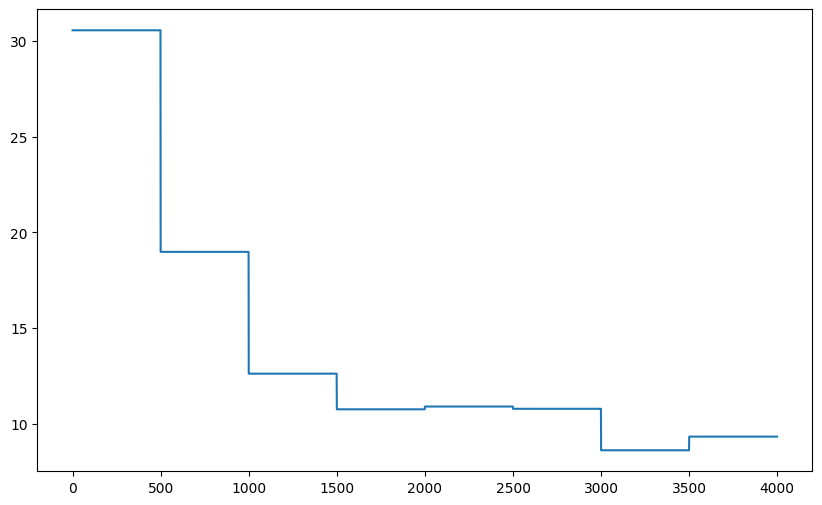

100%|██████████| 20/20 [00:00<00:00, 485.59it/s]


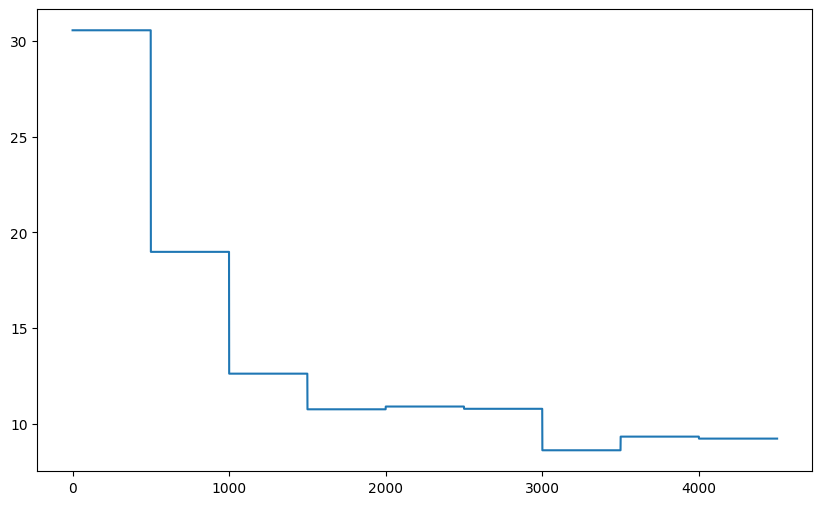

100%|██████████| 20/20 [00:00<00:00, 470.50it/s]


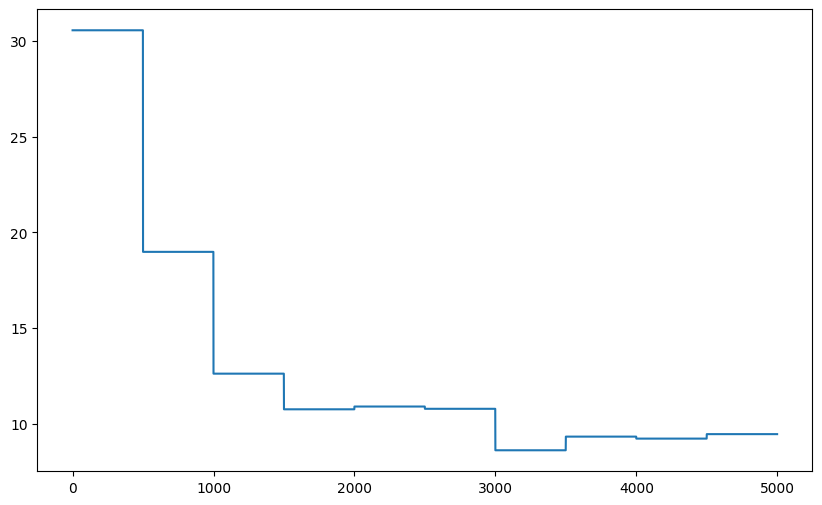

100%|██████████| 20/20 [00:00<00:00, 458.00it/s]


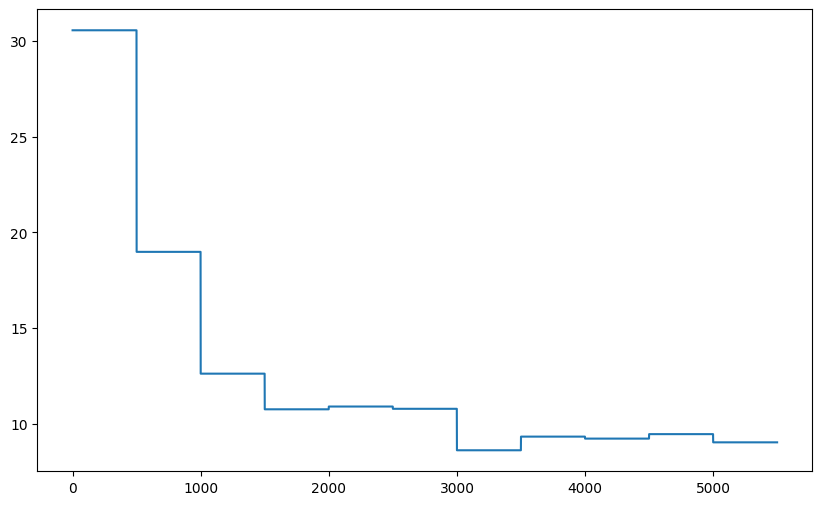

100%|██████████| 20/20 [00:00<00:00, 454.11it/s]


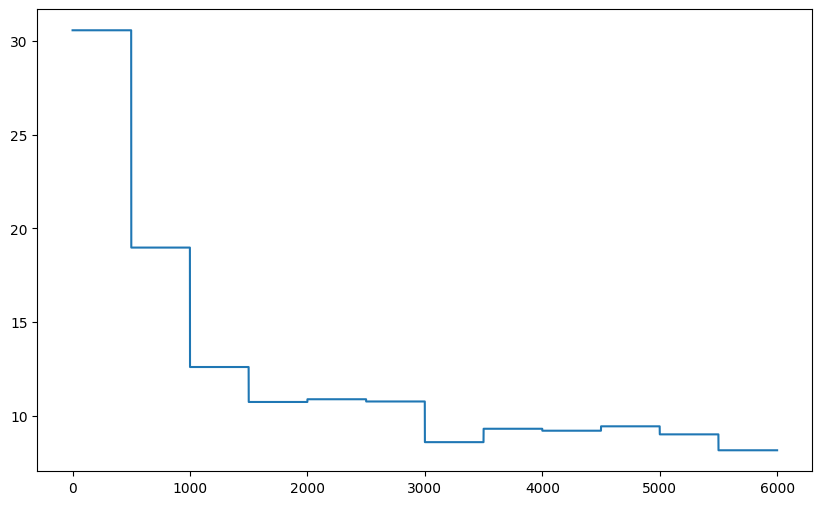

100%|██████████| 20/20 [00:00<00:00, 475.22it/s]


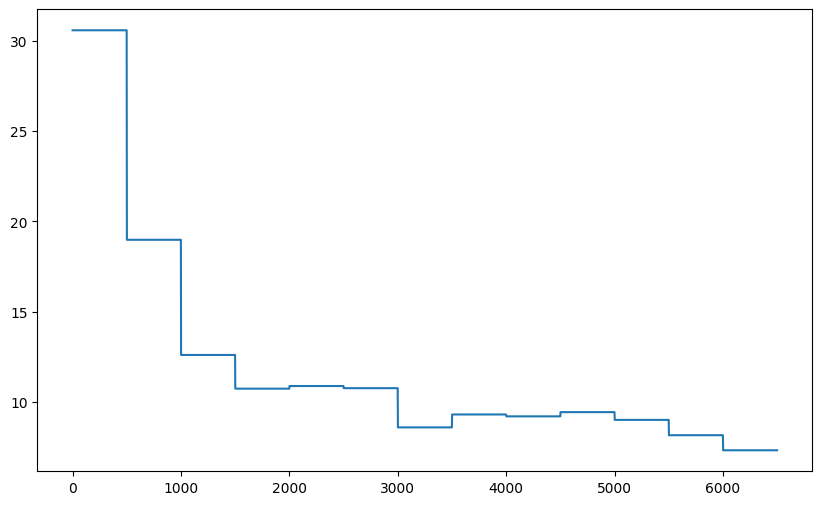

100%|██████████| 20/20 [00:00<00:00, 470.02it/s]


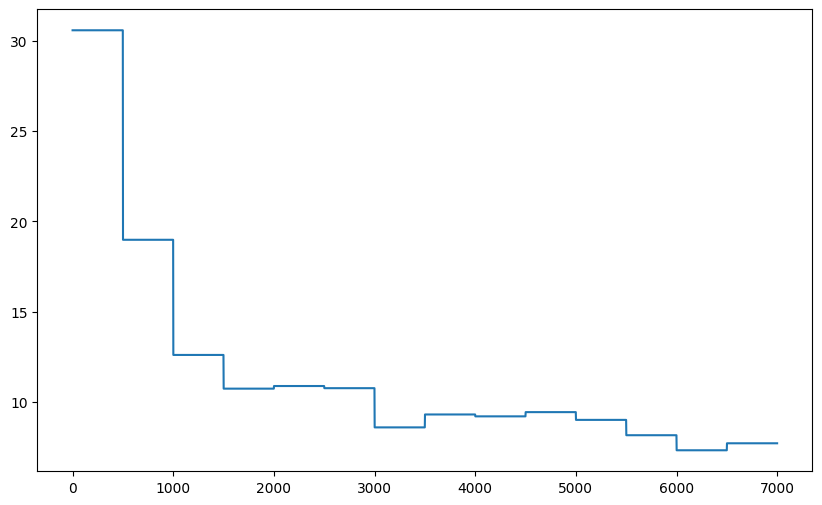

100%|██████████| 20/20 [00:00<00:00, 497.26it/s]


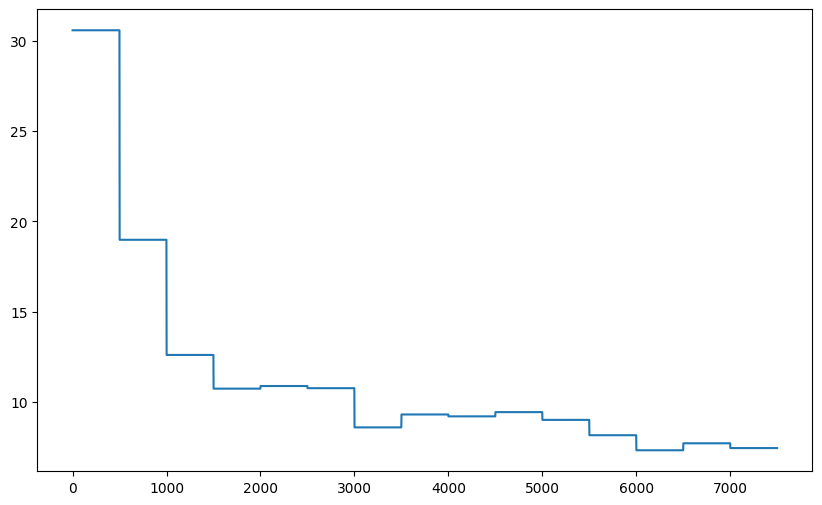

100%|██████████| 20/20 [00:00<00:00, 444.91it/s]


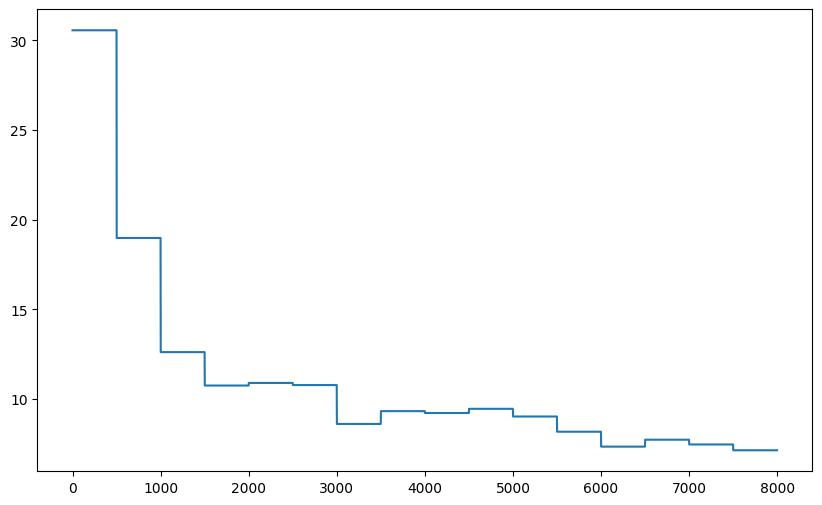

100%|██████████| 20/20 [00:00<00:00, 433.25it/s]


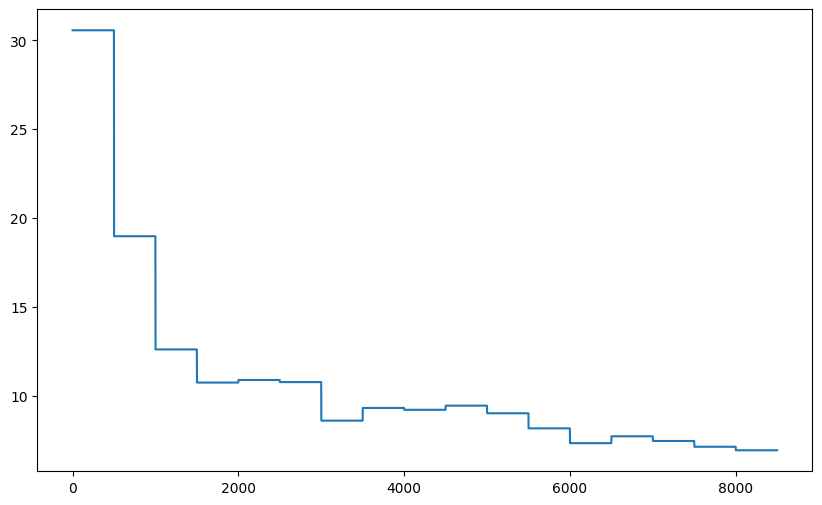

100%|██████████| 20/20 [00:00<00:00, 444.29it/s]


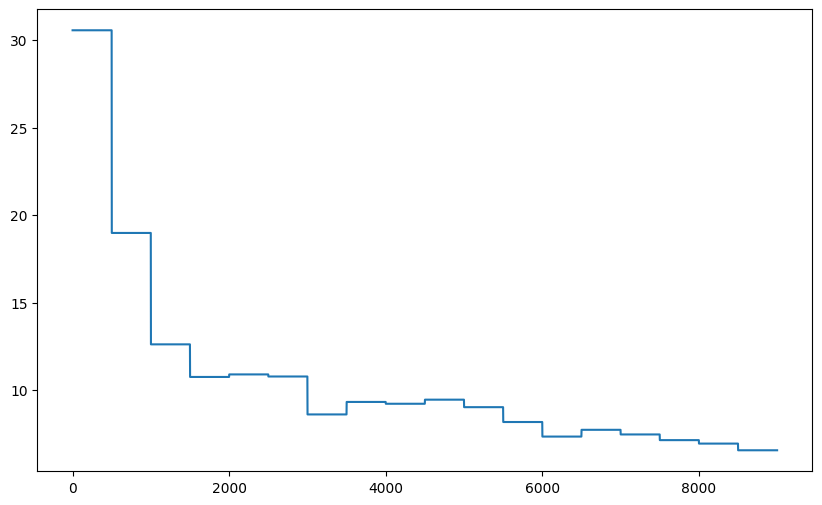

100%|██████████| 20/20 [00:00<00:00, 442.11it/s]


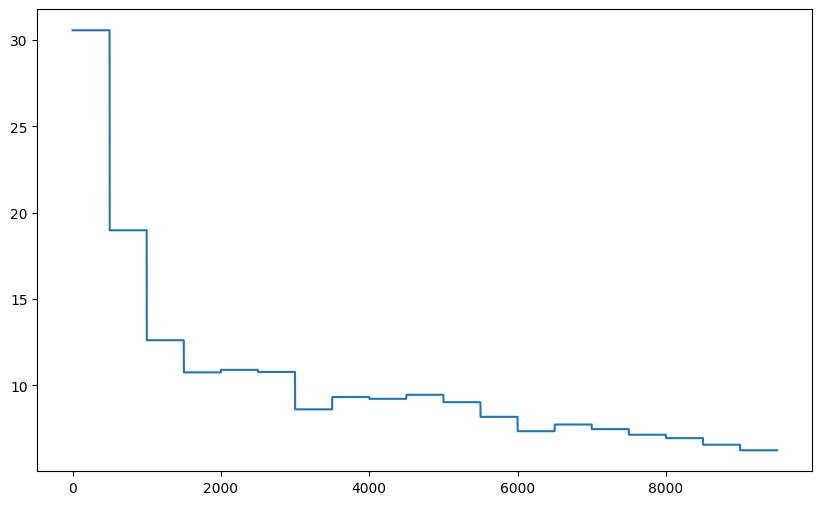

100%|██████████| 20/20 [00:00<00:00, 465.03it/s]


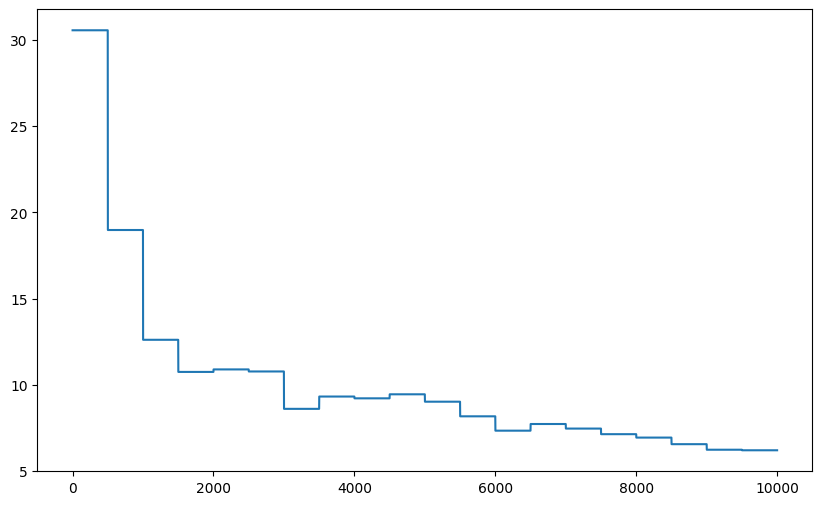

100%|██████████| 20/20 [00:00<00:00, 451.42it/s]


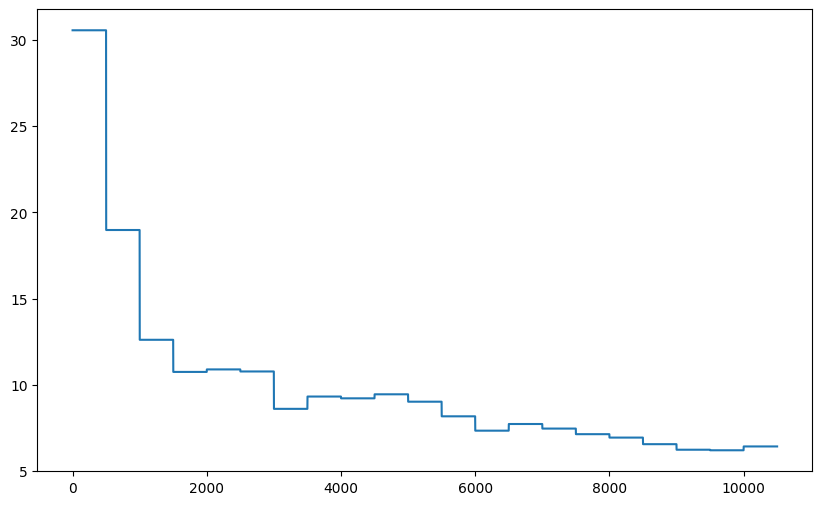

100%|██████████| 20/20 [00:00<00:00, 526.21it/s]


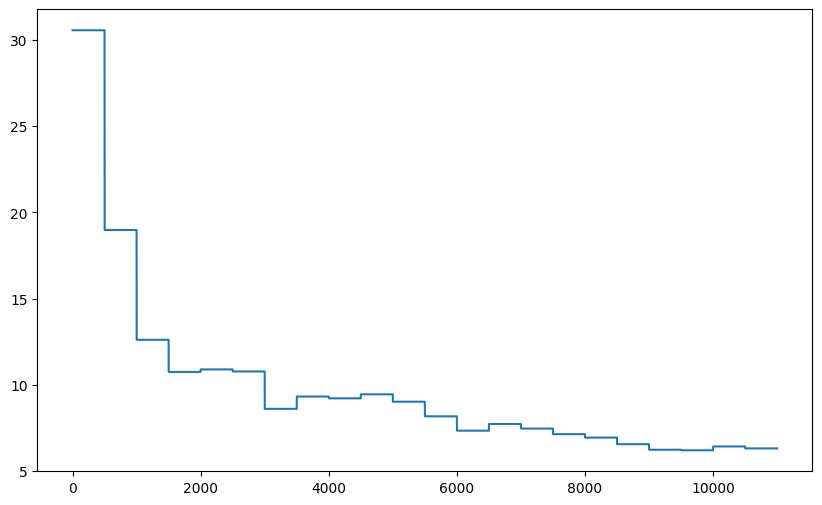

100%|██████████| 20/20 [00:00<00:00, 479.08it/s]


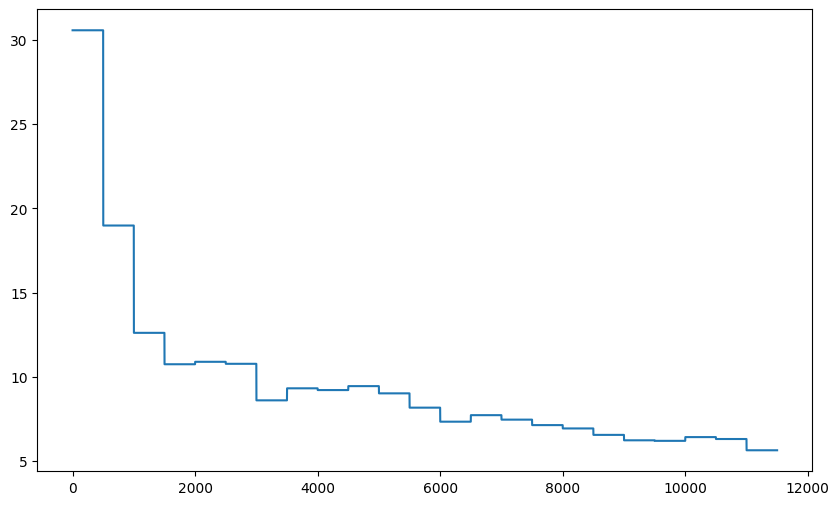

100%|██████████| 20/20 [00:00<00:00, 446.35it/s]


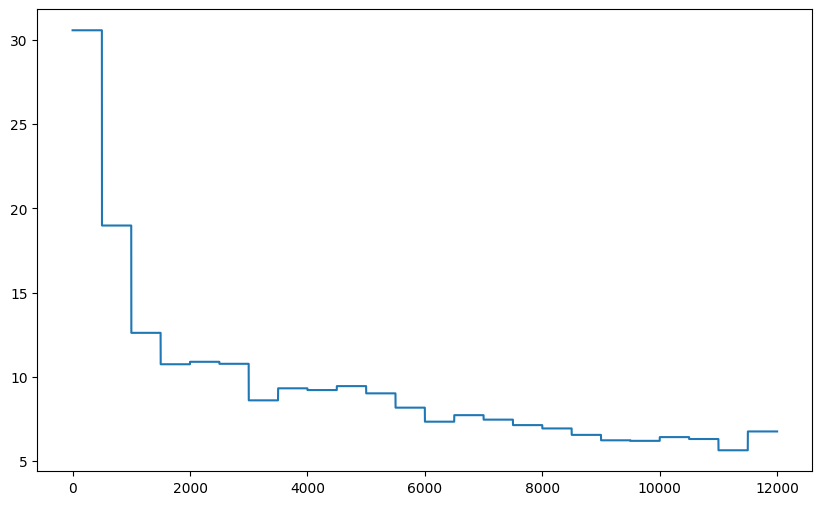

100%|██████████| 20/20 [00:00<00:00, 489.92it/s]


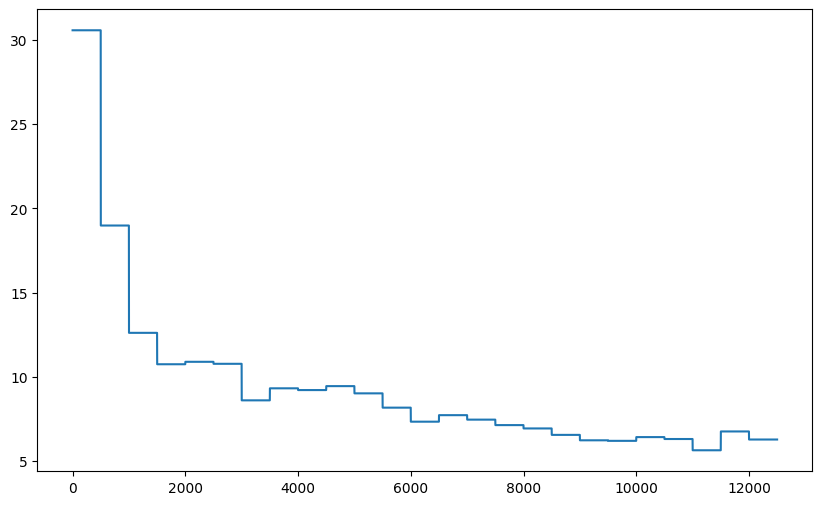

100%|██████████| 20/20 [00:00<00:00, 425.01it/s]


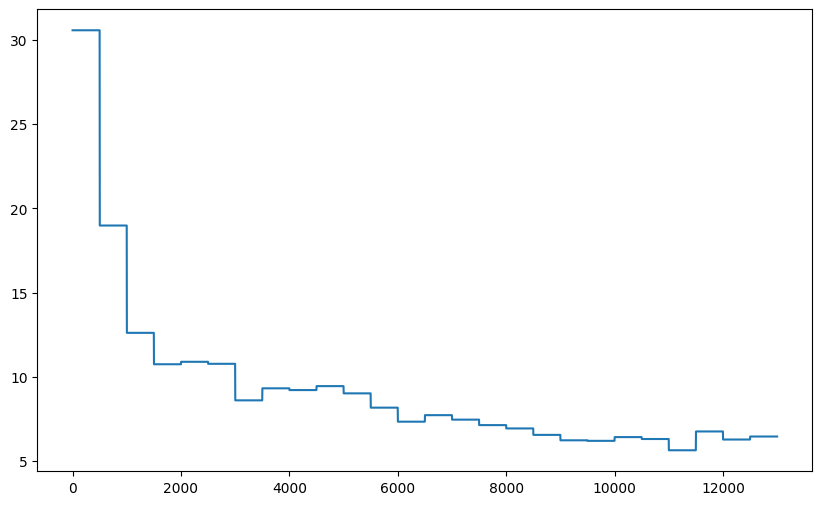

100%|██████████| 20/20 [00:00<00:00, 391.23it/s]


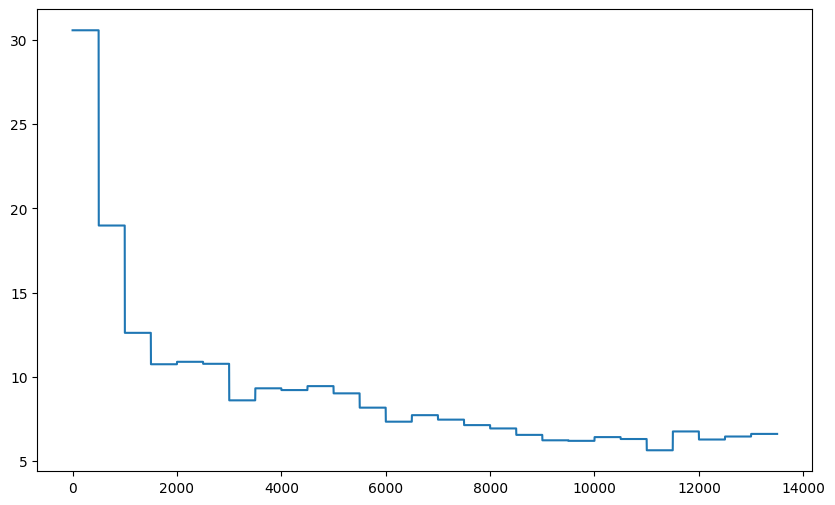

100%|██████████| 20/20 [00:00<00:00, 318.93it/s]


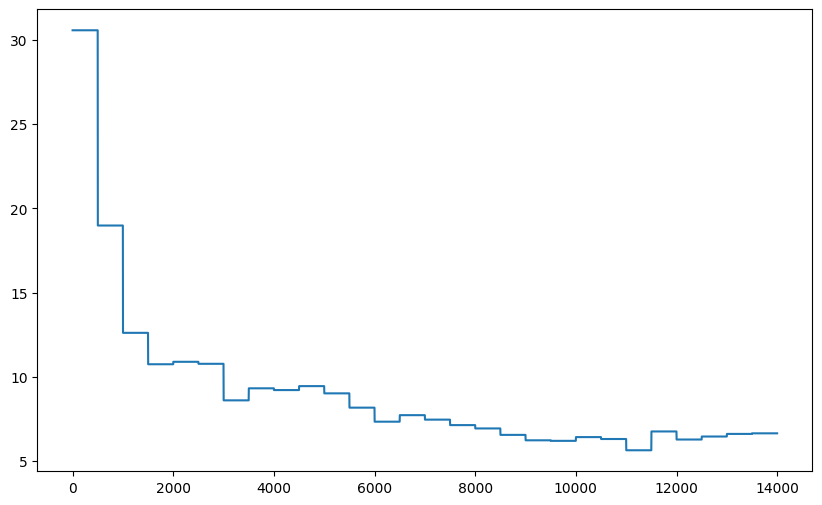

100%|██████████| 20/20 [00:00<00:00, 461.35it/s]


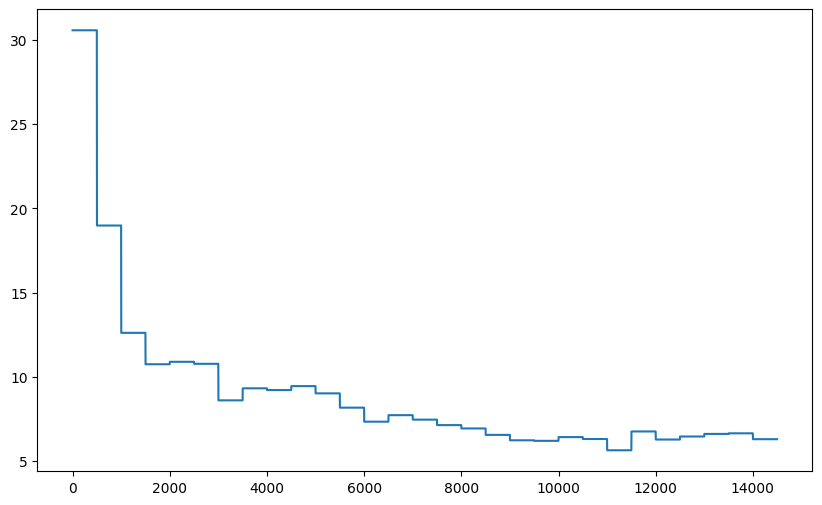

100%|██████████| 20/20 [00:00<00:00, 438.37it/s]


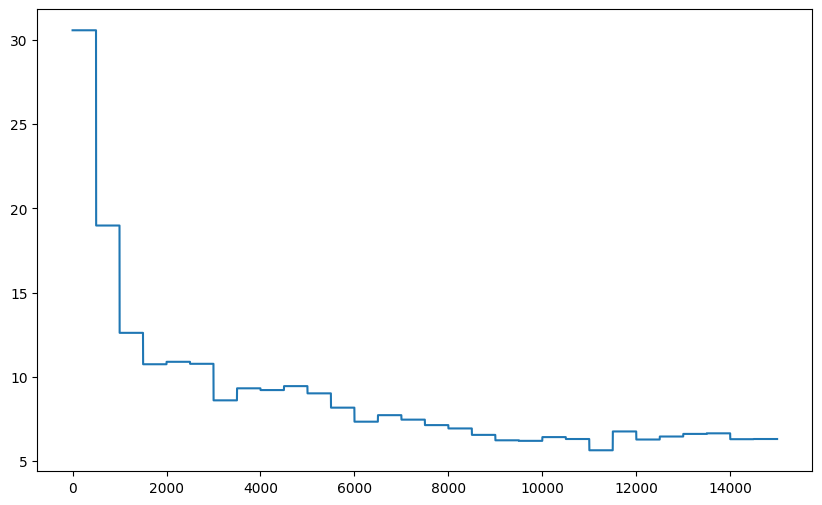

100%|██████████| 20/20 [00:00<00:00, 424.03it/s]


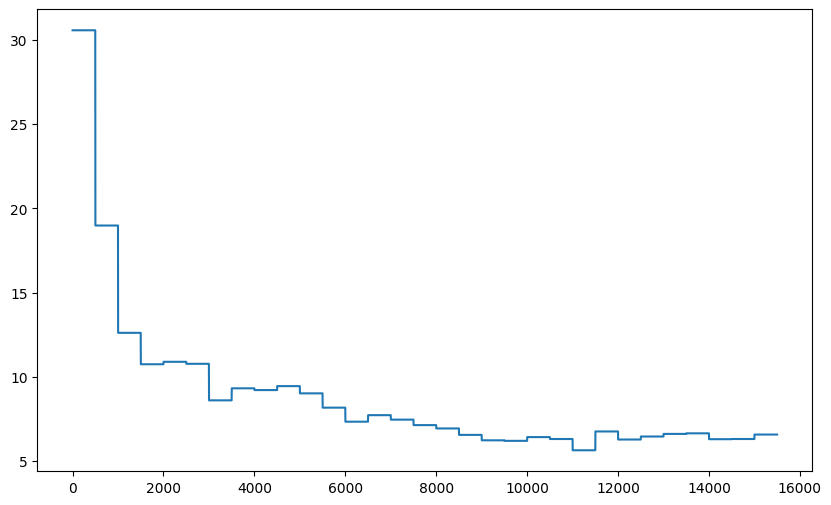

100%|██████████| 20/20 [00:00<00:00, 439.87it/s]


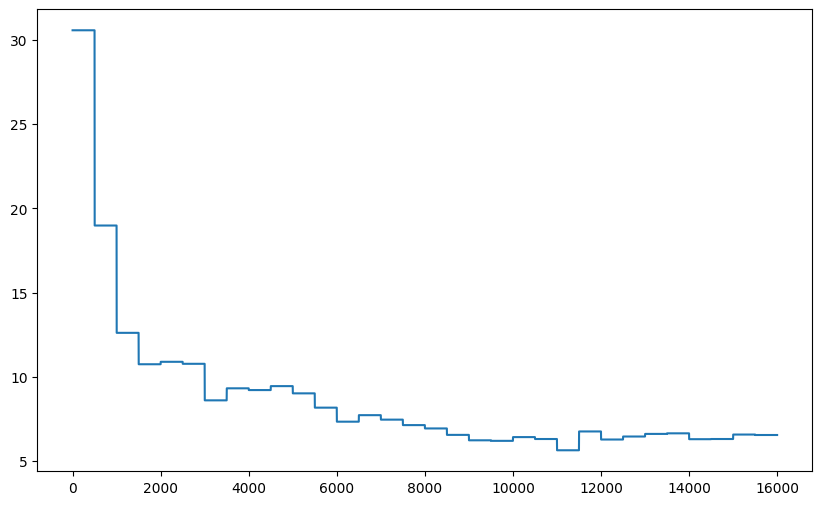

100%|██████████| 20/20 [00:00<00:00, 439.86it/s]


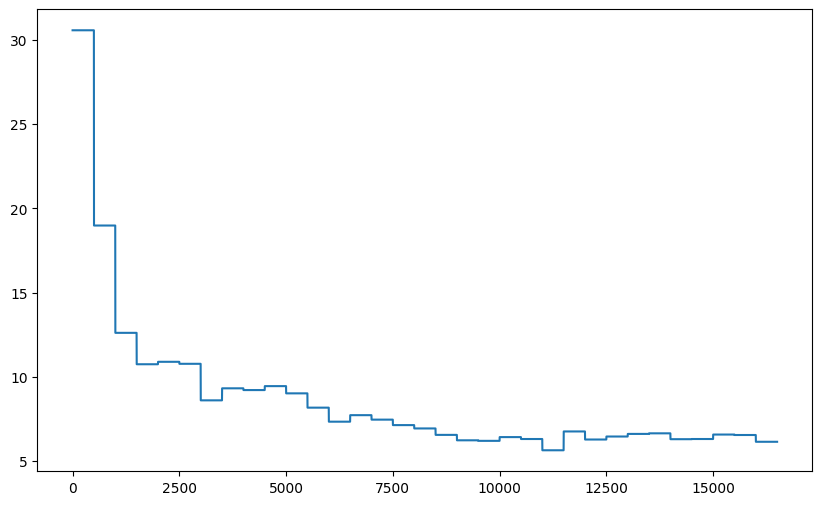

100%|██████████| 20/20 [00:00<00:00, 464.87it/s]


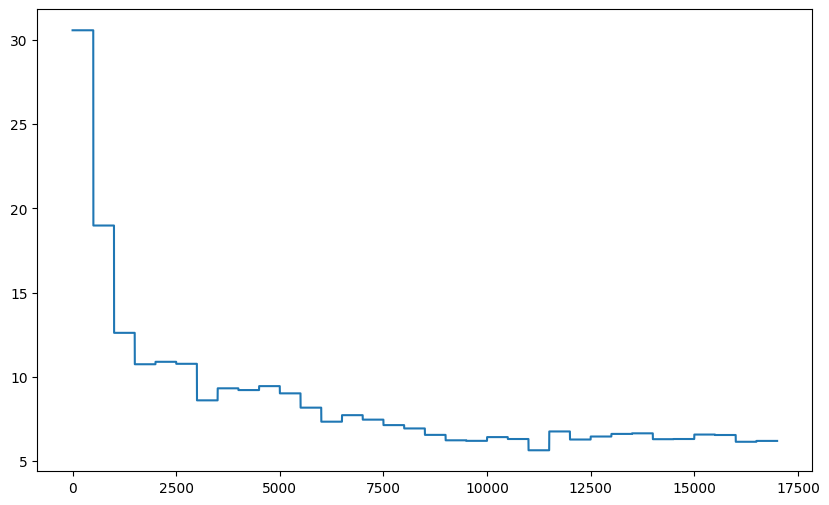

100%|██████████| 20/20 [00:00<00:00, 498.64it/s]


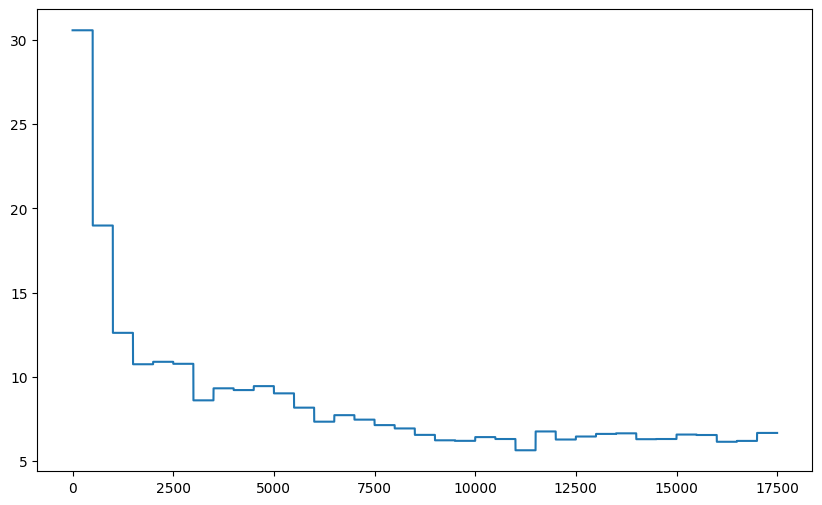

100%|██████████| 20/20 [00:00<00:00, 455.50it/s]


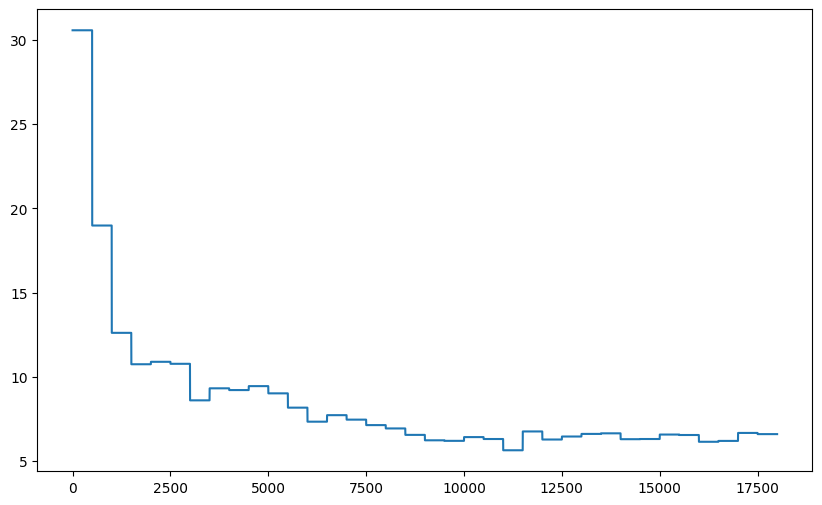

100%|██████████| 20/20 [00:00<00:00, 452.45it/s]


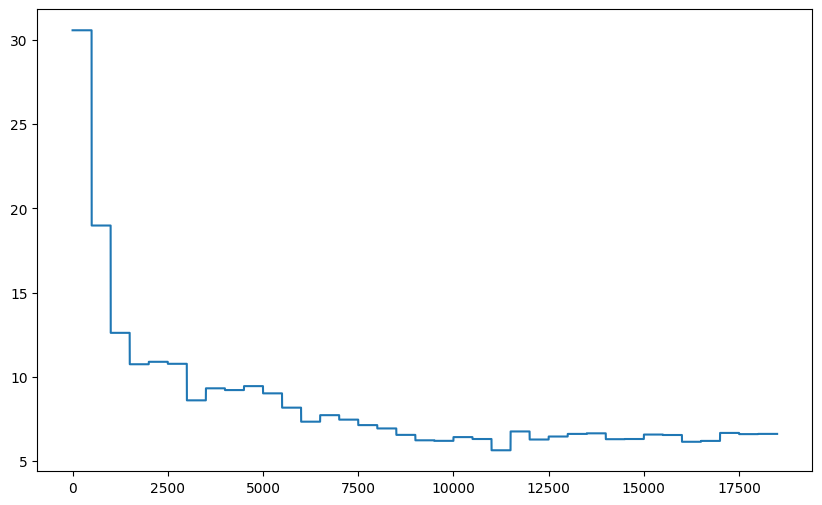

100%|██████████| 20/20 [00:00<00:00, 447.44it/s]


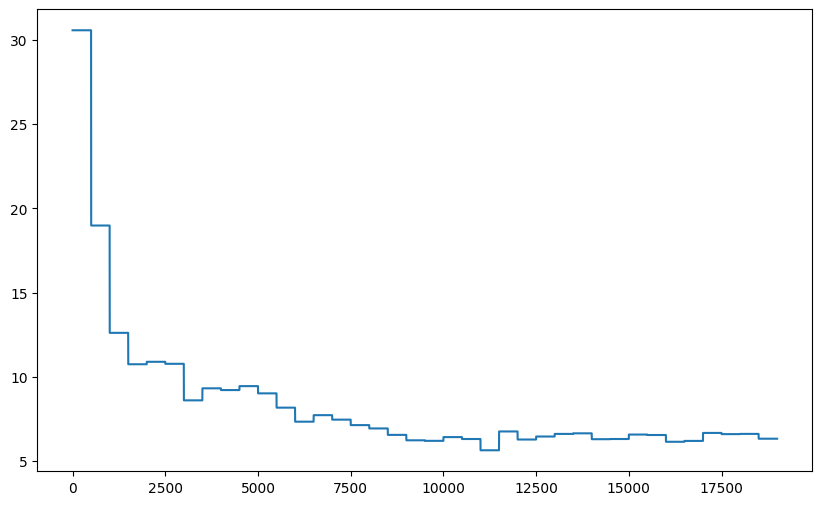

100%|██████████| 20/20 [00:00<00:00, 474.37it/s]


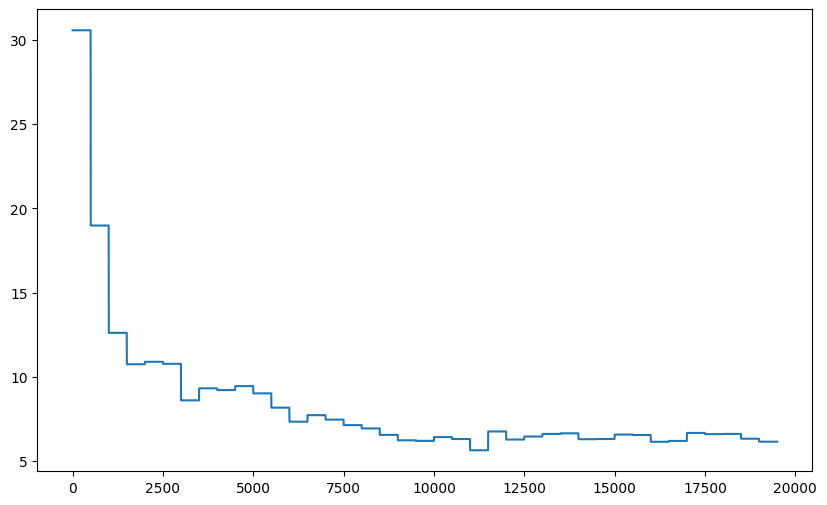

100%|██████████| 20/20 [00:00<00:00, 485.71it/s]


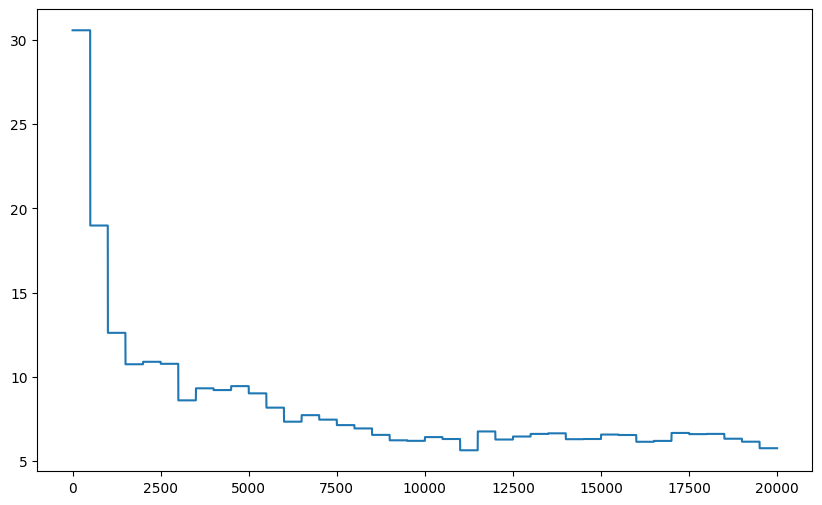

100%|██████████| 20/20 [00:00<00:00, 454.45it/s]


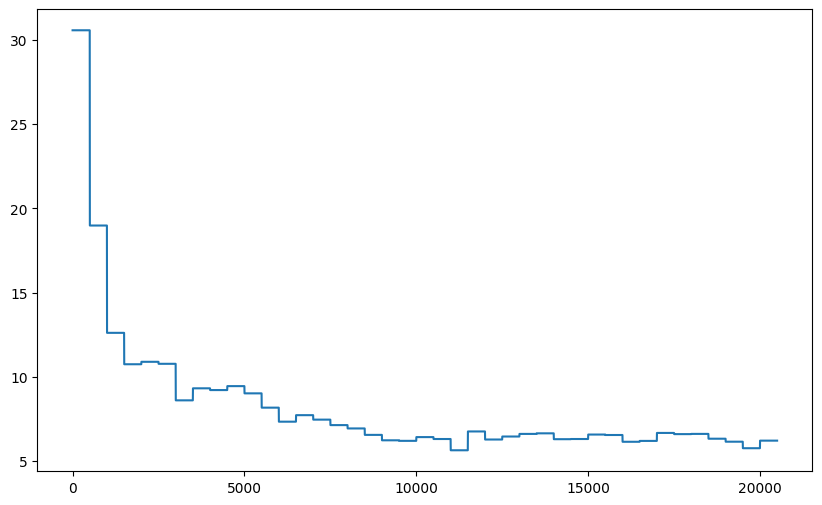

100%|██████████| 20/20 [00:00<00:00, 465.64it/s]


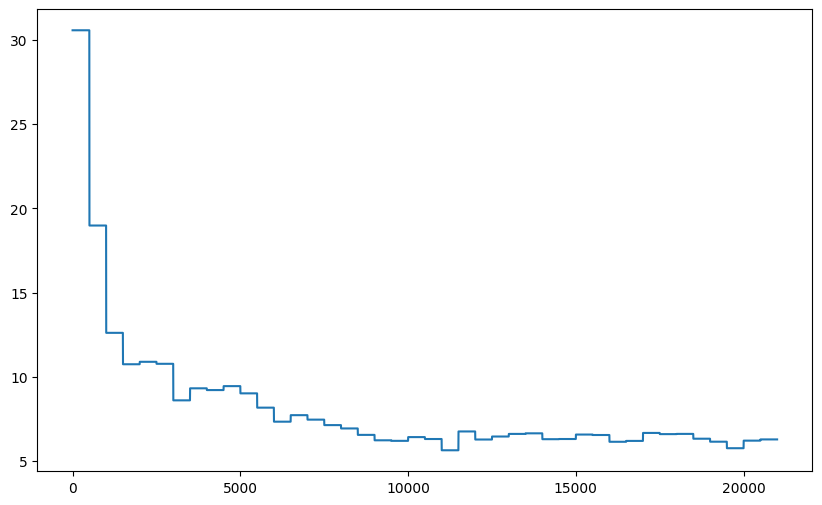

100%|██████████| 20/20 [00:00<00:00, 448.90it/s]


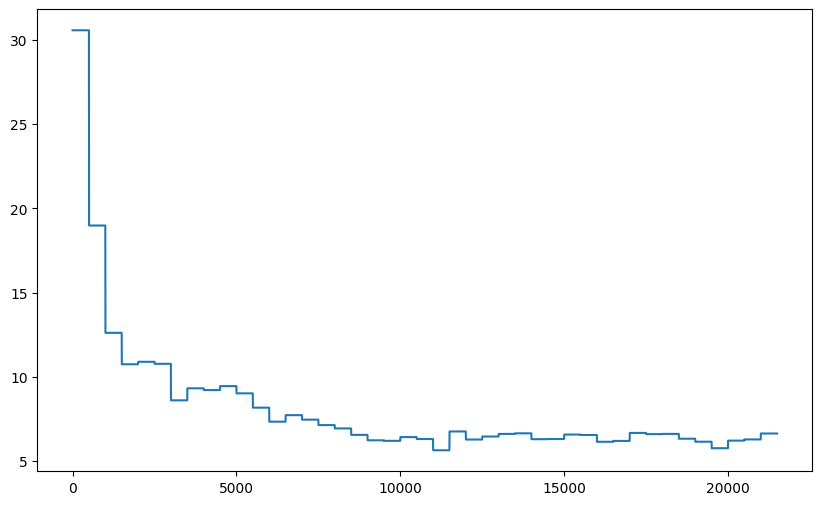

100%|██████████| 20/20 [00:00<00:00, 504.95it/s]


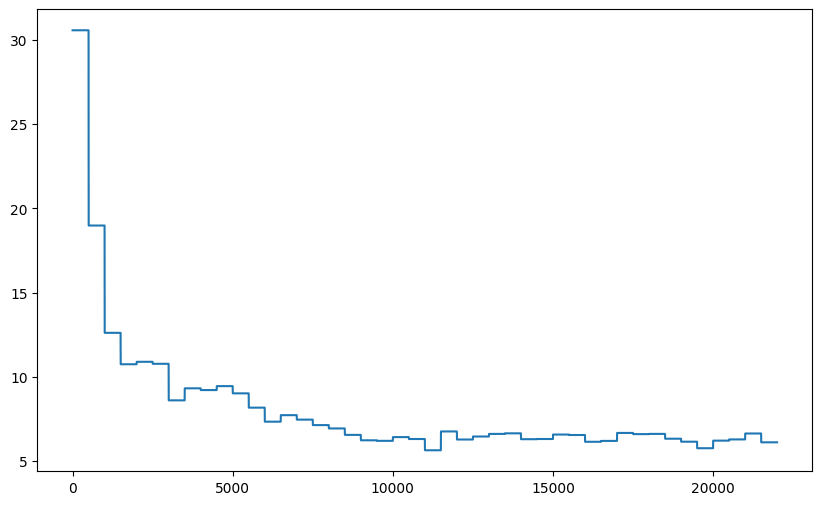

100%|██████████| 20/20 [00:00<00:00, 335.35it/s]


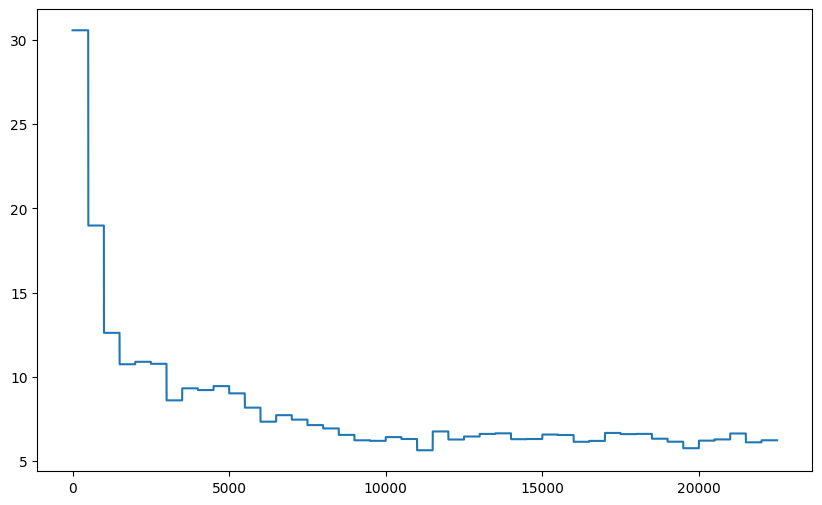

100%|██████████| 20/20 [00:00<00:00, 464.58it/s]


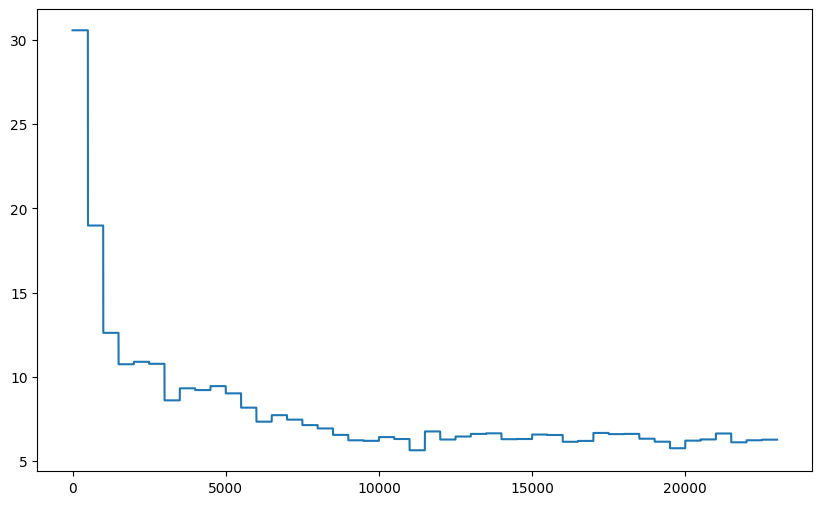

100%|██████████| 20/20 [00:00<00:00, 421.14it/s]


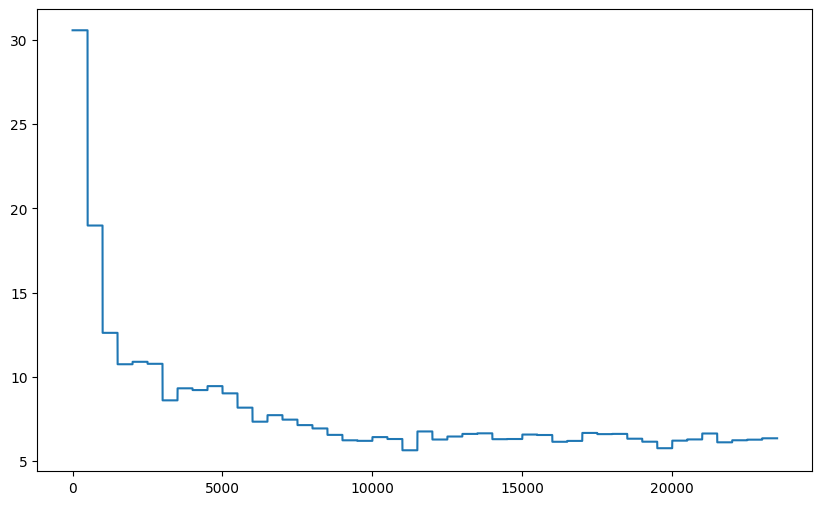

100%|██████████| 20/20 [00:00<00:00, 477.53it/s]


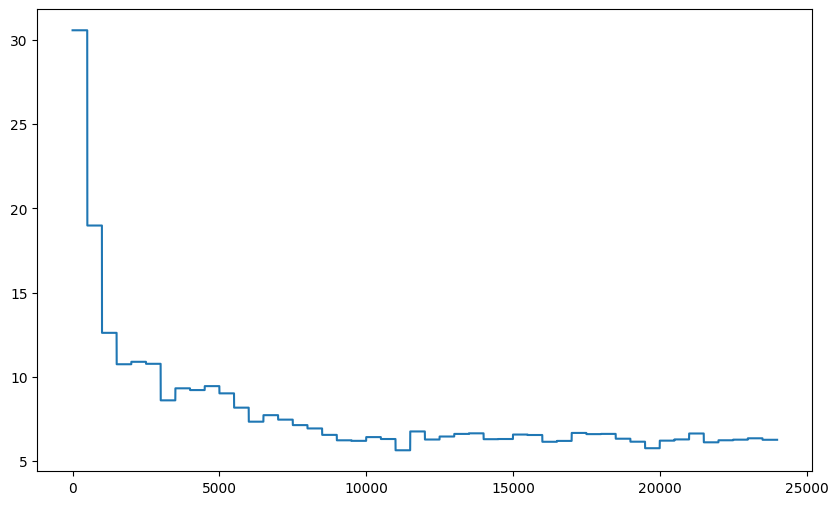

100%|██████████| 20/20 [00:00<00:00, 180.21it/s]


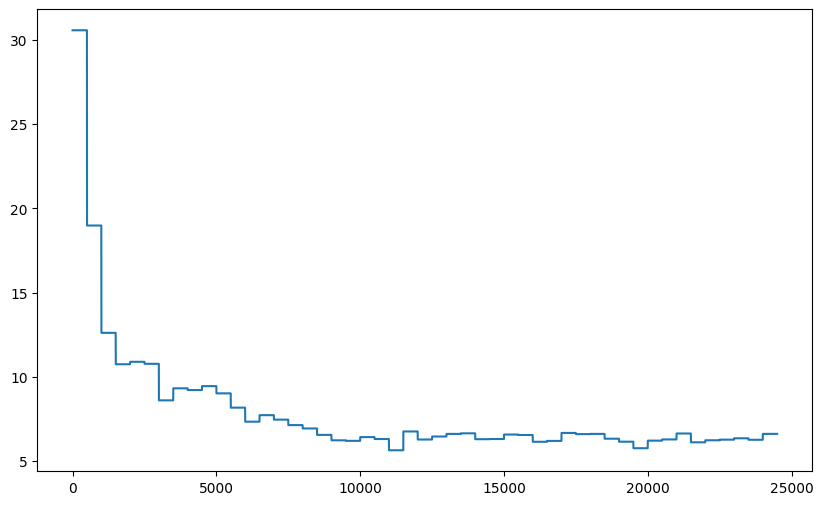

100%|██████████| 20/20 [00:00<00:00, 452.14it/s]


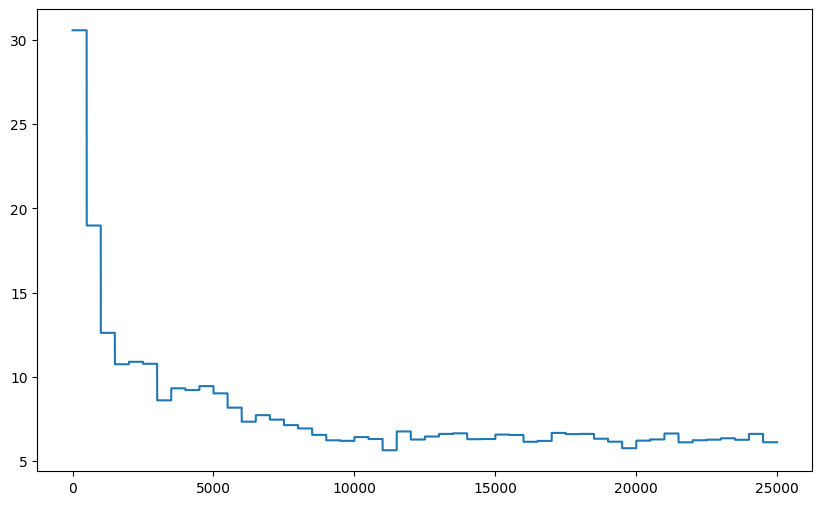

In [9]:
losses = []
val_losses = []
for epoch in range(n_epochs):
    for number in tqdm(dataloader):
        optimizer.zero_grad()
        reconstructed = ae(number.unsqueeze(1))
        loss = criterion(number, reconstructed)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
    if cur_step % display_step == 0 and cur_step > 0:
        # print(f"Step {cur_step}: mean loss: {sum(losses)/len(losses)}")
        for val_numbers in val_dataloader:
            reconstructed = ae(number.unsqueeze(1))
            val_loss = criterion(number, reconstructed)
            val_losses.append(val_loss.item())

        plt.figure(figsize=(10, 6))
        plt.plot(val_losses)
        plt.show()
        # plot_distribution(reconstructed.squeeze().detach().numpy(), custom_pdf, x_range)

    cur_step += 1



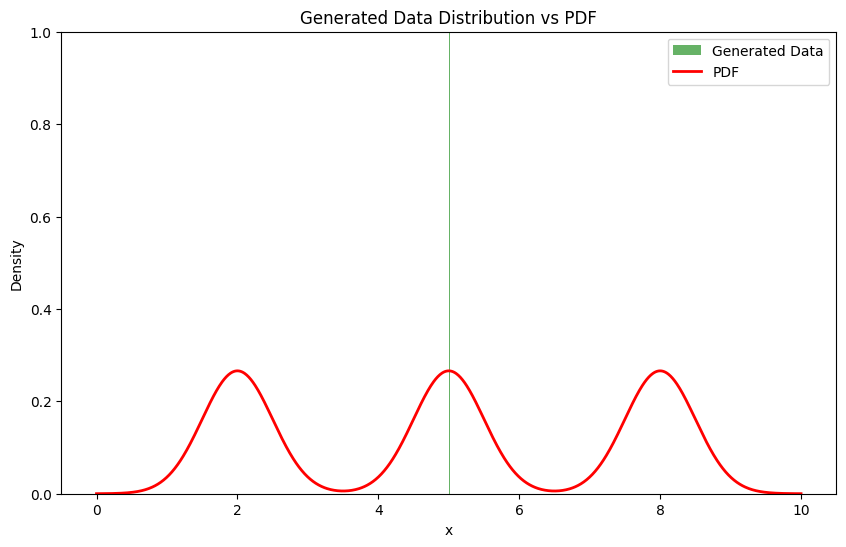

In [10]:
plot_distribution(reconstructed.squeeze().detach().numpy(), custom_pdf, x_range)